# Engine Model
### Based on the CFD Calculation for the vessel, a predicting model is set up
The data is taken from the document: "VPAe ShipModel Valparaiso Express" provided by the stakeholer
The csv file is generated form the Exceltable and read into the notebook.

In [132]:
# Package and library import

import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [118]:
# Read data
df = pd.read_csv('../data/Engine_Model_Data.csv')

In [119]:
# Remove withspace and replace by '_'
df.columns = df.columns.map(lambda h: ''.join(h).replace(' ', '_'))

In [120]:
# Correct the wrong .dot in Power [kW]
df['Power_(PD)_[kW]'] *= 1000 

In [121]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Draft_AP_[m]            3550 non-null   float64
 1   Mean_Draft_[m]          3550 non-null   float64
 2   Draft_FP_[m]            3550 non-null   float64
 3   Trim_[m]                3550 non-null   float64
 4   Speed_[kn]              3550 non-null   float64
 5   Volume_[m^3]            3550 non-null   float64
 6   Power_(PD)_[kW]         3550 non-null   float64
 7   Dynamic_draft_AP_[m]    3550 non-null   float64
 8   Dynamic_mean_draft_[m]  3550 non-null   float64
 9   Dynamic_draft_FP_[m]    3550 non-null   float64
 10  Dynamic_trim_[m]        3550 non-null   float64
dtypes: float64(11)
memory usage: 305.2 KB


In [122]:
px.scatter(df, x='Power_(PD)_[kW]', y='Speed_[kn]', color = 'Power_(PD)_[kW]', color_continuous_scale=['#ff6600','#ff6600'])

In [123]:
px.scatter(df, x='Trim_[m]', y='Mean_Draft_[m]')

In [124]:
# Drop feautres
lst_drop = ['Dynamic_draft_AP_[m]', 'Dynamic_mean_draft_[m]', 'Dynamic_draft_FP_[m]', 'Dynamic_trim_[m]', 'Volume_[m^3]', 'Draft_AP_[m]', 'Draft_FP_[m]']
df = df.drop(lst_drop, axis = 1)

In [125]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean_Draft_[m]   3550 non-null   float64
 1   Trim_[m]         3550 non-null   float64
 2   Speed_[kn]       3550 non-null   float64
 3   Power_(PD)_[kW]  3550 non-null   float64
dtypes: float64(4)
memory usage: 111.1 KB


<AxesSubplot:>

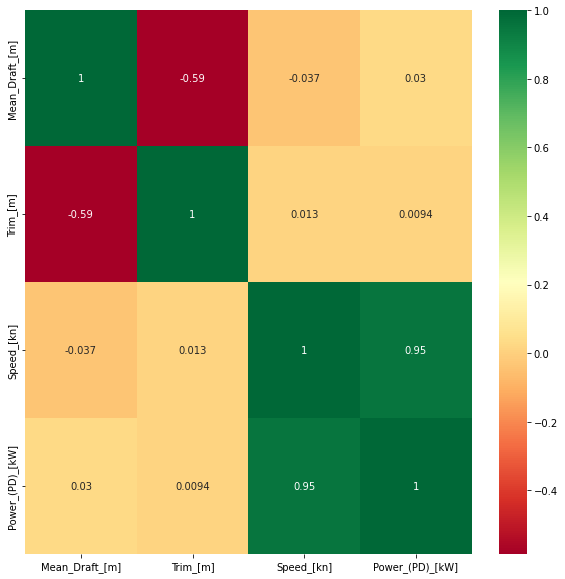

In [126]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

In [127]:
# Define target
X = df.drop(['Power_(PD)_[kW]'], axis = 1)
y = df['Power_(PD)_[kW]']

In [128]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [129]:
# Fit Decision Tree Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [130]:
# Predict
y_predict = model.predict(X_test)

In [134]:
mse = mean_squared_error(y_test, y_predict)
rmse = math.sqrt(mean_squared_error(y_test, y_predict))
# print the predicted value
print("Mean Squared Error : % d" % mse) 
print("Root Mean Squared Error : % d" % rmse) 

Mean Squared Error :  20468
Root Mean Squared Error :  143


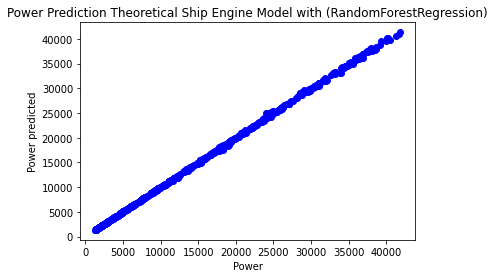

In [23]:
# plot predicted data 
plt.scatter(y_test, model.predict(X_test), color = 'blue')  

# specify title and labels
plt.title('Power Prediction Theoretical Ship Engine Model with (RandomForestRegression)')  
plt.xlabel('Power') 
plt.ylabel('Power predicted') 
plt.show() 

## Model Evaluation
Use the Model with "test" data to evaluate the model


In [24]:
# Input order: Draft [m], Trim [m], Speed [kn] 
Value_set = [[6.8, 5.8, 8.0]]

In [25]:
Value_predict = model.predict(Value_set)

print('Test Value out put : % f' % Value_predict) 

Test Value out put :  1345.900000


/Users/herschel2/neuefische/capstone_ml_shipping/.venv/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



The validation of the model shows the following:\
DecisionTreeRegressor: The values are predicted precise in the case a datapoint is given als input. For datapoints between given model points, the result is rounded either up or down with a treshhold of .5\
RandomForestRegressor: the predicted values are close to the given datapoints in the target. The differences are small and hence selected for further use to predict the theoretical required Power of the engine to move the vessel.

In [108]:
# Import dataframe
df_ship = pd.read_csv('../data/Featureselection03.csv')
df.columns = df.columns.map(lambda h: ''.join(h).replace(' ', '_'))

In [109]:
df_ship['DDM.MIDSB.act.m'].mean()

11.684116934678093

In [110]:
#draft 12m
df_draft = df_ship[df_ship['DDM.MIDSB.act.m'] <=12.02]
df_draft = df_draft[df_draft['DDM.MIDSB.act.m'] >=11.98]

In [111]:
#df_draft = df_draft[(df_draft['DDM.AFTCL.act.m']-df_draft['DDM.FWDCL.act.m']) <= 0.1]
#df_draft = df_draft[(df_draft['DDM.AFTCL.act.m']-df_draft['DDM.FWDCL.act.m']) >= -0.1]

In [112]:
#dif=(df_draft['DDM.AFTCL.act.m']-df_draft['DDM.AFTCL.act.m'])
#dif

In [113]:
df_draft = df_draft[df_ship['ME.POW.act.kW'] >=1]


/var/folders/b8/6_2xlsw15q96vkwqlsdf85980000gn/T/ipykernel_50836/1134462633.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [114]:
fig = px.scatter(df_draft, x="ME.POW.act.kW", y="V.SOG.act.kn", trendline='ols')
fig.show()

In [135]:
df_model = df[(df['Mean_Draft_[m]'] == 12.0) & (df['Trim_[m]'] == 0)]

In [136]:
df_model

,Mean_Draft_[m],Trim_[m],Speed_[kn],Power_(PD)_[kW]
136,12.0,0.0,8.0,1560.0
362,12.0,0.0,9.0,2176.0
588,12.0,0.0,10.0,2928.0
814,12.0,0.0,11.0,3842.0
1040,12.0,0.0,12.0,4929.0
1266,12.0,0.0,13.0,6190.0
1492,12.0,0.0,14.0,7633.0
1718,12.0,0.0,15.0,9303.0
1944,12.0,0.0,16.0,11256.0
2170,12.0,0.0,17.0,13500.0


In [138]:
fig = px.line(df_model, x='Power_(PD)_[kW]', y='Speed_[kn]')

fig.show()

In [ ]:
fig = px.scatter(df_draft, x="ME.POW.act.kW", y="V.SOG.act.kn", trendline='ols')
fig = px.line(df_model, x='Power_(PD)_[kW]', y='Speed_[kn]')
fig.show()

## Use pickle to safe model 
The model is safed with the help of pickle and made available for use later or on an other place with new data.

In [27]:
#import pickle

# safe model
#RandForestReg_EngineModel = '../models/RFReg_Engine_Model.sav'
#pickle.dump(model, open(RandForestReg_EngineModel, 'wb'))